In [1]:
import os
import numpy as np
import pandas as pd
import yfinance as yf
import statsmodels.api as sm
import matplotlib.pyplot as plt
from datetime import datetime

# tej_key
tej_key = 'jghNMtKQaDfb50Jck2NwCbboFMtzoW'
api_base = 'https://api.tej.com.tw'

os.environ['TEJAPI_KEY'] = tej_key 
os.environ['TEJAPI_BASE'] = api_base

In [2]:
from zipline.sources.TEJ_Api_Data import get_universe

pool = get_universe(start = '2021-01-04', 
                    end = '2021-01-04',  # 選取 2021 年年初已上市的股票
                    mkt_bd_e = 'TSE',  # 填入：上市一般版股票
                    stktp_e = 'Common Stock',  # 填入：普通股股票 
                    main_ind_e = 'General Industry') # general industry 篩掉金融產業
pool

Currently used TEJ API key call quota 1/1000 (0.1%)
Currently used TEJ API key data quota 844/10000000 (0.01%)


['1101',
 '1102',
 '1103',
 '1104',
 '1108',
 '1109',
 '1110',
 '1201',
 '1203',
 '1210',
 '1213',
 '1215',
 '1216',
 '1217',
 '1218',
 '1219',
 '1220',
 '1225',
 '1227',
 '1229',
 '1231',
 '1232',
 '1233',
 '1234',
 '1235',
 '1236',
 '1301',
 '1303',
 '1304',
 '1305',
 '1307',
 '1308',
 '1309',
 '1310',
 '1312',
 '1313',
 '1314',
 '1315',
 '1316',
 '1319',
 '1321',
 '1323',
 '1324',
 '1325',
 '1326',
 '1339',
 '1342',
 '1402',
 '1409',
 '1410',
 '1413',
 '1414',
 '1416',
 '1417',
 '1418',
 '1419',
 '1423',
 '1432',
 '1434',
 '1435',
 '1436',
 '1437',
 '1438',
 '1439',
 '1440',
 '1441',
 '1442',
 '1443',
 '1444',
 '1445',
 '1446',
 '1447',
 '1449',
 '1451',
 '1452',
 '1453',
 '1454',
 '1455',
 '1456',
 '1457',
 '1459',
 '1460',
 '1463',
 '1464',
 '1465',
 '1466',
 '1467',
 '1468',
 '1470',
 '1471',
 '1472',
 '1473',
 '1474',
 '1475',
 '1476',
 '1477',
 '1503',
 '1504',
 '1506',
 '1507',
 '1512',
 '1513',
 '1514',
 '1515',
 '1516',
 '1517',
 '1519',
 '1521',
 '1522',
 '1524',
 '1525',
 

In [3]:
len(pool)

836

In [4]:
import TejToolAPI

start_time = pd.Timestamp('2021-01-05')
end_time = pd.Timestamp('2022-12-30')  # 將時間字串轉換成時間格式

data = TejToolAPI.get_history_data(start = start_time,
                                   end = end_time,
                                   ticker = pool,  # 填入：正確參數名稱 & 股票池列表 ( list )
                                   fin_type = 'A', # 為累計資料，舉例來說，Q3累計：1月～9月的資料。
                                   columns = ['主產業別_中文', '常續ROE', '營業毛利率', '本益比','營運產生現金流量', '投資產生現金流量'],
                                   transfer_to_chinese = True)

data['自由現金流量'] = data['營運產生現金流量_A'] + data['投資產生現金流量_A']  # 計算自由現金流量 = 營運產生現金流量 + (-)投資產生現金流量
data.drop(columns = ['營運產生現金流量_A', '投資產生現金流量_A'], inplace = True)  # 移除欄位

data

Currently used TEJ API key call quota 87/1000 (8.7%)
Currently used TEJ API key data quota 1304615/10000000 (13.05%)


,股票代碼,日期,主產業別_中文,本益比,常續ROE_A,營業毛利率_A,自由現金流量
0,1101,2021-01-05,M1100 水泥工業,10.26,NaN,NaN,NaN
1,1101,2021-01-06,M1100 水泥工業,10.23,NaN,NaN,NaN
2,1101,2021-01-07,M1100 水泥工業,10.20,NaN,NaN,NaN
3,1101,2021-01-08,M1100 水泥工業,10.23,NaN,NaN,NaN
4,1101,2021-01-11,M1100 水泥工業,10.26,NaN,NaN,NaN
...,...,...,...,...,...,...,...
405795,9958,2022-12-26,M2000 鋼鐵工業,28.83,4.35,10.79,-686003.0
405796,9958,2022-12-27,M2000 鋼鐵工業,29.43,4.35,10.79,-686003.0
405797,9958,2022-12-28,M2000 鋼鐵工業,30.74,4.35,10.79,-686003.0
405798,9958,2022-12-29,M2000 鋼鐵工業,30.37,4.35,10.79,-686003.0


In [5]:
# 取出最近年度(2022-12-30)的資料
data_last_1_2Y = data[data['日期'].isin(['2021-12-30', '2022-12-30'])].reset_index(drop = True)  

# 取出股票基本資料與 ROE 資料方便觀察
PE_1Y_data = data_last_1_2Y[['股票代碼', '日期', '主產業別_中文', '本益比']]

PE_1Y_data

,股票代碼,日期,主產業別_中文,本益比
0,1101,2021-12-30,M1100 水泥工業,14.08
1,1101,2022-12-30,M1100 水泥工業,28.04
2,1102,2021-12-30,M1100 水泥工業,10.16
3,1102,2022-12-30,M1100 水泥工業,9.45
4,1103,2021-12-30,M1100 水泥工業,7.31
...,...,...,...,...
1650,9946,2022-12-30,M2500 建材營造,23.46
1651,9955,2021-12-30,M9900 其他,NaN
1652,9955,2022-12-30,M9900 其他,NaN
1653,9958,2021-12-30,M2000 鋼鐵工業,18.33


In [6]:
PE_1Y_data['PE小於前年']=PE_1Y_data['本益比'] - PE_1Y_data.groupby('股票代碼')['本益比'].shift(1)
PE_1Y_data

,股票代碼,日期,主產業別_中文,本益比,PE小於前年
0,1101,2021-12-30,M1100 水泥工業,14.08,NaN
1,1101,2022-12-30,M1100 水泥工業,28.04,13.96
2,1102,2021-12-30,M1100 水泥工業,10.16,NaN
3,1102,2022-12-30,M1100 水泥工業,9.45,-0.71
4,1103,2021-12-30,M1100 水泥工業,7.31,NaN
...,...,...,...,...,...
1650,9946,2022-12-30,M2500 建材營造,23.46,-12.49
1651,9955,2021-12-30,M9900 其他,NaN,NaN
1652,9955,2022-12-30,M9900 其他,NaN,NaN
1653,9958,2021-12-30,M2000 鋼鐵工業,18.33,NaN


In [7]:
set_1 = set(PE_1Y_data[PE_1Y_data['PE小於前年'] < 0]['股票代碼'])  # 篩選符合選股條件的公司
set_1

{'1102',
 '1104',
 '1108',
 '1203',
 '1219',
 '1232',
 '1233',
 '1234',
 '1235',
 '1236',
 '1301',
 '1307',
 '1308',
 '1310',
 '1313',
 '1315',
 '1316',
 '1319',
 '1339',
 '1342',
 '1409',
 '1413',
 '1414',
 '1417',
 '1419',
 '1434',
 '1436',
 '1438',
 '1439',
 '1443',
 '1444',
 '1447',
 '1449',
 '1451',
 '1453',
 '1454',
 '1457',
 '1463',
 '1464',
 '1467',
 '1468',
 '1471',
 '1475',
 '1476',
 '1477',
 '1503',
 '1514',
 '1516',
 '1517',
 '1519',
 '1521',
 '1522',
 '1524',
 '1525',
 '1526',
 '1527',
 '1530',
 '1531',
 '1532',
 '1535',
 '1536',
 '1537',
 '1539',
 '1540',
 '1541',
 '1560',
 '1568',
 '1582',
 '1583',
 '1587',
 '1597',
 '1603',
 '1605',
 '1609',
 '1611',
 '1612',
 '1616',
 '1618',
 '1707',
 '1708',
 '1709',
 '1711',
 '1712',
 '1713',
 '1717',
 '1722',
 '1723',
 '1725',
 '1727',
 '1730',
 '1733',
 '1734',
 '1736',
 '1762',
 '1773',
 '1783',
 '1786',
 '1789',
 '1809',
 '1817',
 '1903',
 '1906',
 '2008',
 '2012',
 '2013',
 '2015',
 '2025',
 '2027',
 '2028',
 '2030',
 '2034',
 

In [8]:
# 取出股票基本資料與 Gross Margin 資料方便觀察
data_last_1Y = data[data['日期'] == '2022-12-30'].reset_index(drop = True) 
cash_1Y_data = data_last_1Y[['股票代碼', '日期', '主產業別_中文', '自由現金流量']]

cash_1Y_data

,股票代碼,日期,主產業別_中文,自由現金流量
0,1101,2022-12-30,M1100 水泥工業,-7925014.0
1,1102,2022-12-30,M1100 水泥工業,13823534.0
2,1103,2022-12-30,M1100 水泥工業,53554.0
3,1104,2022-12-30,M1100 水泥工業,583449.0
4,1108,2022-12-30,M1100 水泥工業,-246216.0
...,...,...,...,...
819,9944,2022-12-30,M9900 其他,597193.0
820,9945,2022-12-30,M9900 其他,-791032.0
821,9946,2022-12-30,M2500 建材營造,554326.0
822,9955,2022-12-30,M9900 其他,-28051.0


In [9]:
# 依不同產業分類，計算出產業平均 GM
# 填入：分類函數 & 欲進行分類的財務科目 & 欲計算平均的財務科目 
cash_data_ave = cash_1Y_data.groupby('主產業別_中文')['自由現金流量'].transform('mean')  

# 加入 '產業平均毛利率' 欄位
cash_1Y_data['產業自由現金流量'] = cash_data_ave

cash_1Y_data

,股票代碼,日期,主產業別_中文,自由現金流量,產業自由現金流量
0,1101,2022-12-30,M1100 水泥工業,-7925014.0,1.064371e+06
1,1102,2022-12-30,M1100 水泥工業,13823534.0,1.064371e+06
2,1103,2022-12-30,M1100 水泥工業,53554.0,1.064371e+06
3,1104,2022-12-30,M1100 水泥工業,583449.0,1.064371e+06
4,1108,2022-12-30,M1100 水泥工業,-246216.0,1.064371e+06
...,...,...,...,...,...
819,9944,2022-12-30,M9900 其他,597193.0,-2.150994e+05
820,9945,2022-12-30,M9900 其他,-791032.0,-2.150994e+05
821,9946,2022-12-30,M2500 建材營造,554326.0,-5.611645e+05
822,9955,2022-12-30,M9900 其他,-28051.0,-2.150994e+05


In [10]:
# 篩選符合選股條件的公司
# 填入：正確的篩選條件
set_2 = set(cash_1Y_data[cash_1Y_data['自由現金流量'] > cash_1Y_data['產業自由現金流量']]['股票代碼'])
set_2

{'1102',
 '1109',
 '1216',
 '1227',
 '1229',
 '1301',
 '1303',
 '1304',
 '1316',
 '1319',
 '1326',
 '1339',
 '1342',
 '1402',
 '1409',
 '1432',
 '1434',
 '1435',
 '1436',
 '1440',
 '1443',
 '1444',
 '1453',
 '1464',
 '1476',
 '1477',
 '1503',
 '1504',
 '1512',
 '1513',
 '1516',
 '1519',
 '1521',
 '1522',
 '1524',
 '1525',
 '1533',
 '1536',
 '1537',
 '1539',
 '1541',
 '1560',
 '1568',
 '1587',
 '1598',
 '1604',
 '1605',
 '1608',
 '1611',
 '1614',
 '1615',
 '1617',
 '1707',
 '1708',
 '1709',
 '1712',
 '1717',
 '1718',
 '1722',
 '1723',
 '1725',
 '1726',
 '1731',
 '1760',
 '1762',
 '1789',
 '1802',
 '1805',
 '1905',
 '1907',
 '2006',
 '2007',
 '2009',
 '2010',
 '2012',
 '2015',
 '2017',
 '2020',
 '2022',
 '2023',
 '2025',
 '2028',
 '2029',
 '2030',
 '2031',
 '2032',
 '2033',
 '2049',
 '2059',
 '2062',
 '2069',
 '2103',
 '2105',
 '2107',
 '2108',
 '2109',
 '2114',
 '2204',
 '2206',
 '2227',
 '2228',
 '2231',
 '2233',
 '2241',
 '2247',
 '2303',
 '2308',
 '2313',
 '2317',
 '2324',
 '2330',
 

In [11]:
# 取出近兩年(2022-12-30, 2021-12-30)的資料
data_last_2Y = data[data['日期'].isin(['2022-12-30', '2021-12-30'])].reset_index(drop = True)

# 計算公司兩年平均的 ROE
ROE_2Y_ave = data_last_2Y.groupby('股票代碼')['常續ROE_A'].mean()

# 從 Series 轉成 Dataframe，並重新命名欄位
ROE_2Y_ave = pd.DataFrame(ROE_2Y_ave).rename(columns = {'常續ROE_A': '2年平均ROE'})

ROE_2Y_ave

,2年平均ROE
股票代碼,
1101,3.290
1102,6.465
1103,-1.900
1104,4.050
1108,4.900
...,...
9944,1.635
9945,17.845
9946,1.915


In [12]:
set_3 = set(ROE_2Y_ave[ROE_2Y_ave['2年平均ROE'] > 17].index)  # 篩選符合選股條件的公司
set_3

{'1232',
 '1342',
 '1436',
 '1475',
 '1476',
 '1477',
 '1526',
 '1773',
 '2025',
 '2027',
 '2028',
 '2059',
 '2108',
 '2303',
 '2327',
 '2330',
 '2345',
 '2348',
 '2368',
 '2376',
 '2377',
 '2379',
 '2383',
 '2395',
 '2404',
 '2454',
 '2455',
 '2458',
 '2465',
 '2467',
 '2597',
 '2603',
 '2609',
 '2615',
 '2636',
 '2905',
 '2912',
 '2915',
 '3006',
 '3014',
 '3017',
 '3023',
 '3030',
 '3033',
 '3034',
 '3037',
 '3042',
 '3056',
 '3130',
 '3209',
 '3312',
 '3413',
 '3443',
 '3515',
 '3533',
 '3557',
 '3563',
 '3653',
 '4536',
 '4919',
 '4952',
 '4961',
 '5471',
 '5608',
 '6196',
 '6202',
 '6278',
 '6281',
 '6409',
 '6412',
 '6491',
 '6531',
 '6582',
 '6669',
 '6670',
 '6706',
 '6756',
 '8016',
 '8046',
 '8081',
 '8112',
 '8261',
 '8341',
 '8454',
 '8464',
 '8478',
 '9906',
 '9910',
 '9914',
 '9921',
 '9945'}

In [39]:
tickers = list(set_1 & set_2 & set_3 )
tickers

['9906',
 '2458',
 '1342',
 '8464',
 '2912',
 '2404',
 '2915',
 '4919',
 '8341',
 '6670',
 '4536',
 '8454',
 '2603',
 '2377',
 '2059',
 '3037',
 '2025',
 '8016',
 '3533',
 '2395',
 '6278',
 '3034',
 '2615',
 '9914',
 '2303',
 '2454',
 '1476',
 '2379',
 '8046',
 '2028',
 '2330',
 '2609',
 '3017',
 '8478',
 '6669',
 '9921',
 '3557',
 '2345',
 '1436',
 '9910',
 '1477',
 '3056']

In [40]:
len(tickers)

42

In [41]:
# 在每個股票代碼後添加 '.TW'
tickers_tw = [ticker + '.TW' for ticker in tickers]

In [42]:


# 設定時間範圍
start_date = '2021-01-04'
end_date = '2022-12-30'

# 下載股票數據
stock_data = yf.download(tickers_tw, start=start_date, end=end_date)['Adj Close']
# 計算股票收益率
returns = stock_data.pct_change().dropna()

# 獲取三因子數據
ff_factors_url = 'https://mba.tuck.dartmouth.edu/pages/faculty/ken.french/ftp/F-F_Research_Data_Factors_daily_CSV.zip'
ff_factors = pd.read_csv(ff_factors_url, compression='zip', skiprows=3)

# 過濾掉非數據行
ff_factors = ff_factors[ff_factors.iloc[:, 0].apply(lambda x: str(x).isdigit())]

# 設置正確列名
ff_factors.columns = ['Date', 'Mkt-RF', 'SMB', 'HML', 'RF']

# 轉換日期格式
ff_factors['Date'] = pd.to_datetime(ff_factors['Date'], format='%Y%m%d')

# 設置索引
ff_factors.set_index('Date', inplace=True)

# 過濾日期範圍
ff_factors = ff_factors.loc[start_date:end_date]

# 轉換為百分比
ff_factors = ff_factors / 100

# 合併數據
merged_data = returns.join(ff_factors[['Mkt-RF', 'SMB', 'HML', 'RF']], how='inner', lsuffix='_returns', rsuffix='_ff_factors')

# 計算超額收益
excess_returns = merged_data[tickers_tw].subtract(merged_data['RF'], axis=0)

# 創建空的字典儲存回歸模型
models = {}

# 回歸分析
for ticker in tickers_tw:
    Y = excess_returns[ticker]
    X = merged_data[['Mkt-RF', 'SMB', 'HML']]  # 使用正確列名
    X = sm.add_constant(X)  # 添加常數項
    model = sm.OLS(Y, X).fit()
    models[ticker] = model

[*********************100%%**********************]  42 of 42 completed


In [43]:
# 設定最近一週的日期範圍
current_start_date = '2023-01-01'
current_end_date = '2023-01-07'

# 下載最近一週的股票數據
stock_data = yf.download(tickers_tw, start=current_start_date, end=current_end_date)['Adj Close']

# 找到最近一個有數據的日期
last_available_date = stock_data.dropna().index[-1]
current_stock_data = stock_data.loc[last_available_date]

# 獲取前一個交易日的數據
previous_stock_data = stock_data.shift(1).loc[last_available_date]
current_returns = (current_stock_data - previous_stock_data) / previous_stock_data

[*********************100%%**********************]  42 of 42 completed


In [44]:
# 確保日期在ff_factors中存在
if last_available_date not in ff_factors.index:
    last_available_date = ff_factors.index[-1]  # 使用最近的三因子數據

# 過濾到最近可用的三因子數據
current_ff_factors = ff_factors.loc[last_available_date]

# 轉換為百分比
current_ff_factors = current_ff_factors / 100

# 計算當前的超額收益
current_excess_returns = current_returns.subtract(current_ff_factors['RF'])

In [47]:
# 創建一個 DataFrame 來存儲當前的三因子數據
current_factors = pd.DataFrame({
    'const': 1,
    'Mkt-RF': current_ff_factors['Mkt-RF'],
    'SMB': current_ff_factors['SMB'],
    'HML': current_ff_factors['HML']
}, index=[0])

# 使用模型來預測評分
predictions = {}
for ticker in tickers_tw:
    model = models[ticker]
    prediction = model.predict(current_factors)
    predictions[ticker] = prediction[0]

# 顯示預測結果
for ticker, score in predictions.items():
    print(f'{ticker} 評分: {score}')

9906.TW 評分: 0.0002876063885474074
2458.TW 評分: -0.000759783943216848
1342.TW 評分: 0.0017976991291911435
8464.TW 評分: -0.0002632578512638912
2912.TW 評分: 5.7081456712205534e-05
2404.TW 評分: 2.7093086564163582e-05
2915.TW 評分: 0.0008850755955735094
4919.TW 評分: 0.00297225473350739
8341.TW 評分: -0.00021107877968675907
6670.TW 評分: 0.0006941918207800133
4536.TW 評分: 0.0005949499863538734
8454.TW 評分: 0.002112750785717597
2603.TW 評分: 0.0020601967624322803
2377.TW 評分: 0.00022708541860100715
2059.TW 評分: 0.0005997982019974523
3037.TW 評分: 0.0011371199381792656
2025.TW 評分: 0.001903240736179303
8016.TW 評分: 0.0012527093840947001
3533.TW 評分: 0.0013001566048941192
2395.TW 評分: 1.485509284897065e-05
6278.TW 評分: -0.00033288554477826134
3034.TW 評分: 0.00040779070576984583
2615.TW 評分: 0.002809876555261934
9914.TW 評分: -0.0006456844707389276
2303.TW 評分: 0.00024416668837827813
2454.TW 評分: -0.00025498494472486305
1476.TW 評分: 0.0003417914639628428
2379.TW 評分: -0.00014984905598456043
8046.TW 評分: 0.000623875435489498
2028.

In [48]:

#對評分進行排序
sorted_scores = sorted(scores.items(), key=lambda x: x[1], reverse=True)

#取出前五個
top_five_scores = sorted_scores[:5]

#打印前五个評分
for ticker, score in top_five_scores:
    print(f"Top five scores: Ticker: {ticker}, Score: {score}")

Top five scores: Ticker: 9914.TW, Score: 0.02482098991190973
Top five scores: Ticker: 2458.TW, Score: 0.022281012341002326
Top five scores: Ticker: 2303.TW, Score: 0.020574326137473786
Top five scores: Ticker: 3037.TW, Score: 0.019683330121076148
Top five scores: Ticker: 2330.TW, Score: 0.017696435372260066


In [49]:
#去除前五名的 .TW 後缀
top_five_scores_without_tw = [(ticker[:-3], score) for ticker, score in top_five_scores]

#打印前五名（無 .TW 後缀）
for ticker, score in top_five_scores_without_tw:
    print(f"Top five scores: Ticker: {ticker}, Score: {score}")

Top five scores: Ticker: 9914, Score: 0.02482098991190973
Top five scores: Ticker: 2458, Score: 0.022281012341002326
Top five scores: Ticker: 2303, Score: 0.020574326137473786
Top five scores: Ticker: 3037, Score: 0.019683330121076148
Top five scores: Ticker: 2330, Score: 0.017696435372260066


In [51]:
#創建一个名為 tickers 的列表
tickers = []

#將前五名的股票代碼（去除 .TW 後）添加到列表中
for ticker, score in top_five_scores:
    ticker_without_tw = ticker[:-3]  # 去除后缀 ".TW"
    tickers.append(ticker_without_tw)

#打印前五名股票代碼
print("Top five tickers:", tickers)

Top five tickers: ['9914', '2458', '2303', '3037', '2330']


In [52]:
start = '2023-01-01'
end = '2023-12-31'

os.environ['mdate'] = start + ' ' + end
os.environ['ticker'] = ' '.join(tickers) + ' ' + 'IR0001'

!zipline ingest -b tquant  
# 填入：將價量資料導入的程式碼

Merging daily equity files:
Currently used TEJ API key call quota 103/1000 (10.3%)
Currently used TEJ API key data quota 1433748/10000000 (14.34%)


[2024-06-12 10:29:45.641364] INFO: zipline.data.bundles.core: Ingesting tquant.
[2024-06-12 10:29:53.191993] INFO: zipline.data.bundles.core: Ingest tquant successfully.


In [53]:
from zipline.api import *
from zipline.finance import commission, slippage

def initialize(context):
    context.day = 0
    context.tickers = tickers
    set_slippage(slippage.VolumeShareSlippage(volume_limit = 0.025, price_impact = 0.1))  # 填入：本範例使用的滑價模型
    set_commission(commission.Custom_TW_Commission(min_trade_cost = 20, discount = 1.0, tax = 0.003))  # 填入：本範例使用的手續費模型
    set_benchmark(symbol('IR0001'))

In [23]:
def handle_data(context, data):

    # 回測第一天買進
    if context.day == 0:
        for ticker in context.tickers:
            order_percent(symbol(ticker), 1 / len(tickers))  # 填入：正確的下單函數

    context.day += 1  # 以免重複買進

In [24]:
import matplotlib.pyplot as plt

capital_base = 1e7  # 設定初始資金

def analyze(context, results):

    fig = plt.figure()
    ax1 = fig.add_subplot(111)
    results['benchmark_cum'] = results.benchmark_return.add(1).cumprod() * capital_base
    results[['portfolio_value', 'benchmark_cum']].plot(ax = ax1, label = 'Portfolio Value($)')
    ax1.set_ylabel('Portfolio value (TWD)')

    plt.legend(loc = 'upper left')

    plt.gcf().set_size_inches(18, 8)
    plt.grid()
    plt.show()

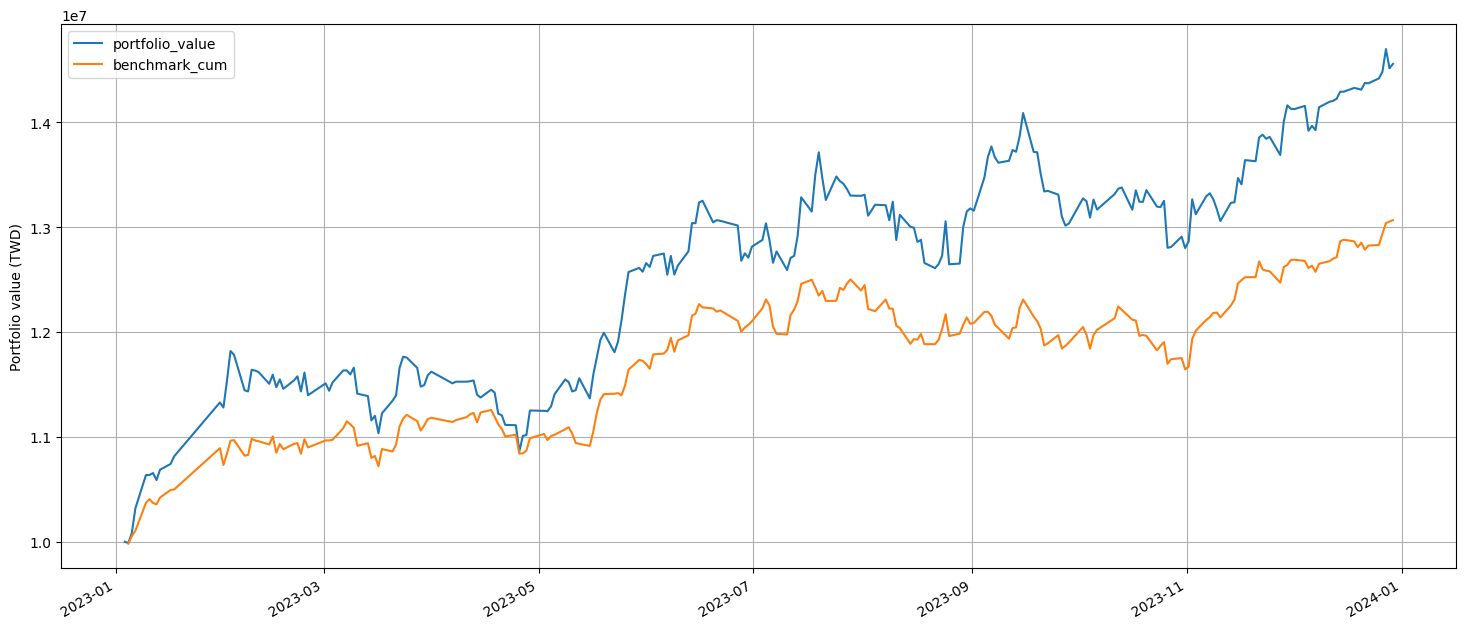

,period_open,period_close,positions,long_exposure,shorts_count,capital_used,ending_exposure,starting_value,long_value,orders,...,max_leverage,trading_days,period_label,algo_volatility,alpha,beta,max_drawdown,sharpe,sortino,benchmark_cum
2023-01-03 13:30:00+08:00,2023-01-03 09:01:00+08:00,2023-01-03 13:30:00+08:00,[],0.00,0,0.000000e+00,0.00,0.00,0.00,"[{'id': 'a246d612e15d4a95b9fc2155417a12e4', 'd...",...,0.000000,1,2023-01,NaN,NaN,NaN,0.000000,NaN,NaN,NaN
2023-01-04 13:30:00+08:00,2023-01-04 09:01:00+08:00,2023-01-04 13:30:00+08:00,"[{'sid': Equity(4 [9914]), 'amount': 8150, 'co...",8357811.95,0,-8.369876e+06,8357811.95,0.00,8357811.95,"[{'id': 'a246d612e15d4a95b9fc2155417a12e4', 'd...",...,0.836791,2,2023-01,0.013542,NaN,NaN,-0.001206,-11.224972,-11.224972,9.982590e+06
2023-01-05 13:30:00+08:00,2023-01-05 09:01:00+08:00,2023-01-05 13:30:00+08:00,"[{'sid': Equity(4 [9914]), 'amount': 11695, 'c...",10053250.35,0,-1.599245e+06,10053250.35,8357811.95,10053250.35,"[{'id': 'a246d612e15d4a95b9fc2155417a12e4', 'd...",...,0.996938,3,2023-01,0.094285,0.257326,1.215094,-0.001206,7.505507,63.999682,1.005424e+07
2023-01-06 13:30:00+08:00,2023-01-06 09:01:00+08:00,2023-01-06 13:30:00+08:00,"[{'sid': Equity(4 [9914]), 'amount': 11695, 'c...",10288067.80,0,0.000000e+00,10288067.80,10053250.35,10288067.80,[],...,0.997008,4,2023-01,0.179846,1.936449,1.797549,-0.001206,11.108118,208.624876,1.010506e+07
2023-01-09 13:30:00+08:00,2023-01-09 09:01:00+08:00,2023-01-09 13:30:00+08:00,"[{'sid': Equity(4 [9914]), 'amount': 11695, 'c...",10605251.00,0,0.000000e+00,10605251.00,10288067.80,10605251.00,[],...,0.997097,5,2023-01,0.224682,4.305906,0.973408,-0.001206,14.008184,367.477558,1.037143e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-25 13:30:00+08:00,2023-12-25 09:01:00+08:00,2023-12-25 13:30:00+08:00,"[{'sid': Equity(4 [9914]), 'amount': 11695, 'c...",13775669.30,0,0.000000e+00,13775669.30,13729088.00,13775669.30,[],...,0.997387,235,2023-12,0.195143,0.091528,1.178527,-0.091426,2.109563,3.341084,1.283076e+07
2023-12-26 13:30:00+08:00,2023-12-26 09:01:00+08:00,2023-12-26 13:30:00+08:00,"[{'sid': Equity(4 [9914]), 'amount': 11695, 'c...",13838675.70,0,0.000000e+00,13838675.70,13775669.30,13838675.70,[],...,0.997387,236,2023-12,0.194748,0.085622,1.175681,-0.091426,2.128844,3.371947,1.293786e+07
2023-12-27 13:30:00+08:00,2023-12-27 09:01:00+08:00,2023-12-27 13:30:00+08:00,"[{'sid': Equity(4 [9914]), 'amount': 11695, 'c...",14055620.00,0,0.000000e+00,14055620.00,13838675.70,14055620.00,[],...,0.997387,237,2023-12,0.194821,0.091115,1.178130,-0.091426,2.200828,3.494649,1.303973e+07
2023-12-28 13:30:00+08:00,2023-12-28 09:01:00+08:00,2023-12-28 13:30:00+08:00,"[{'sid': Equity(4 [9914]), 'amount': 11695, 'c...",13872743.00,0,0.000000e+00,13872743.00,14055620.00,13872743.00,[],...,0.997387,238,2023-12,0.194953,0.074934,1.178227,-0.091426,2.122520,3.361378,1.305349e+07


In [25]:
from zipline import run_algorithm
from zipline.utils.run_algo import get_transaction_detail

start_date = pd.Timestamp(start, tz = 'utc')
end_date = pd.Timestamp(end, tz = 'utc')  # 轉換成時間序列格式

results = run_algorithm(
    start = start_date,
    end = end_date,
    initialize = initialize,
    handle_data = handle_data,
    analyze = analyze,
    bundle = 'tquant',
    capital_base = capital_base,
)

results  # 回測結果

In [26]:
results.columns

Index(['period_open', 'period_close', 'positions', 'long_exposure',
       'shorts_count', 'capital_used', 'ending_exposure', 'starting_value',
       'long_value', 'orders', 'pnl', 'returns', 'treasury_return',
       'transactions', 'benchmark_return', 'short_exposure', 'longs_count',
       'ending_cash', 'gross_leverage', 'net_leverage', 'portfolio_value',
       'starting_exposure', 'short_value', 'ending_value', 'starting_cash',
       'algorithm_period_return', 'treasury_period_return',
       'benchmark_period_return', 'excess_return', 'benchmark_volatility',
       'max_leverage', 'trading_days', 'period_label', 'algo_volatility',
       'alpha', 'beta', 'max_drawdown', 'sharpe', 'sortino', 'benchmark_cum'],
      dtype='object')

<Axes: >

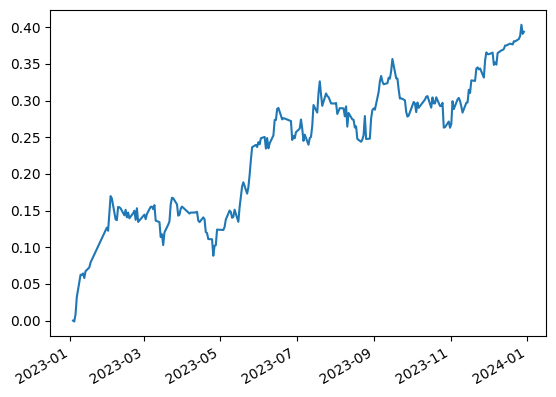

In [27]:
results.returns.cumsum().plot()  # 繪製累積回報圖